In [3]:
from objetos import *
from function import *
import pandas as pd 
import random as rd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


In [ ]:
df=pd.read_excel('Teste2.xlsx')
df

In [ ]:
if all(element.lower() == target for element, target in zip(df.columns, ['component', 'attribute', 'prob_of_failure'])):
    print('oi')
    


In [ ]:
list_comp,attributes=readFile(excel_file='Teste2.xlsx')

In [ ]:
links=createMatrix(attributes_list=attributes,random=False)
links

### Here there are 2 options:
- Generate random conections
- Generate manually connections

#### Randomly
You can use a argument on __createMatrix__ called _random_ as __True__. It will also generate a random matrix list $\\$
Also, you can add parameters on __createLinksRandom__ such as __time_max__ and __risk_max__ to alterate default values 

In [ ]:
createLinksRandom(matrix=links,attributes_list=attributes)

#### Manually

In [ ]:
# createLink(matrix=links,attribute1=attributes[0], attribute2=attributes[1],attribute_list=attributes, time=1, risk=50 )
# createLink(matrix=links,attribute1=attributes[2], attribute2=attributes[3],attribute_list=attributes, time=2, risk=100 )
# createLink(matrix=links,attribute1=attributes[4], attribute2=attributes[5],attribute_list=attributes, time=2, risk=100 )
# createLink(matrix=links,attribute1=attributes[6], attribute2=attributes[7],attribute_list=attributes, time=1, risk=50 )
# createLink(matrix=links,attribute1=attributes[8], attribute2=attributes[9],attribute_list=attributes, time=2, risk=100 )
# createLink(matrix=links,attribute1=attributes[10], attribute2=attributes[11],attribute_list=attributes, time=2, risk=100 )
# createLink(matrix=links,attribute1=attributes[12], attribute2=attributes[13],attribute_list=attributes, time=1, risk=50 )
# createLink(matrix=links,attribute1=attributes[14], attribute2=attributes[15],attribute_list=attributes, time=2, risk=100 )
# createLink(matrix=links,attribute1=attributes[16], attribute2=attributes[1],attribute_list=attributes, time=2, risk=100 )
# createLink(matrix=links,attribute1=attributes[0], attribute2=attributes[15],attribute_list=attributes, time=1, risk=50 )
# createLink(matrix=links,attribute1=attributes[1], attribute2=attributes[12],attribute_list=attributes, time=2, risk=100 )
# createLink(matrix=links,attribute1=attributes[1], attribute2=attributes[4],attribute_list=attributes, time=2, risk=100 )
# links

## Creating Stop Conditions


In [ ]:
Mov=Behaviour(name="Movement")
Mov.addCondition(attributes[1])
Mov.addCondition(attributes[2])
Mov.addCondition(attributes[0])

Inf_Iteraction= Behaviour(name="teste")
behavi=[Mov,Inf_Iteraction]

In [5]:
df= analysis('Simulations/Simulation_20_12_2023_13_43/Analysis/')

In [6]:
result=countFailureMode(df)

Right now, think about other analysis:
- Graphos with color code
- Heatmap 



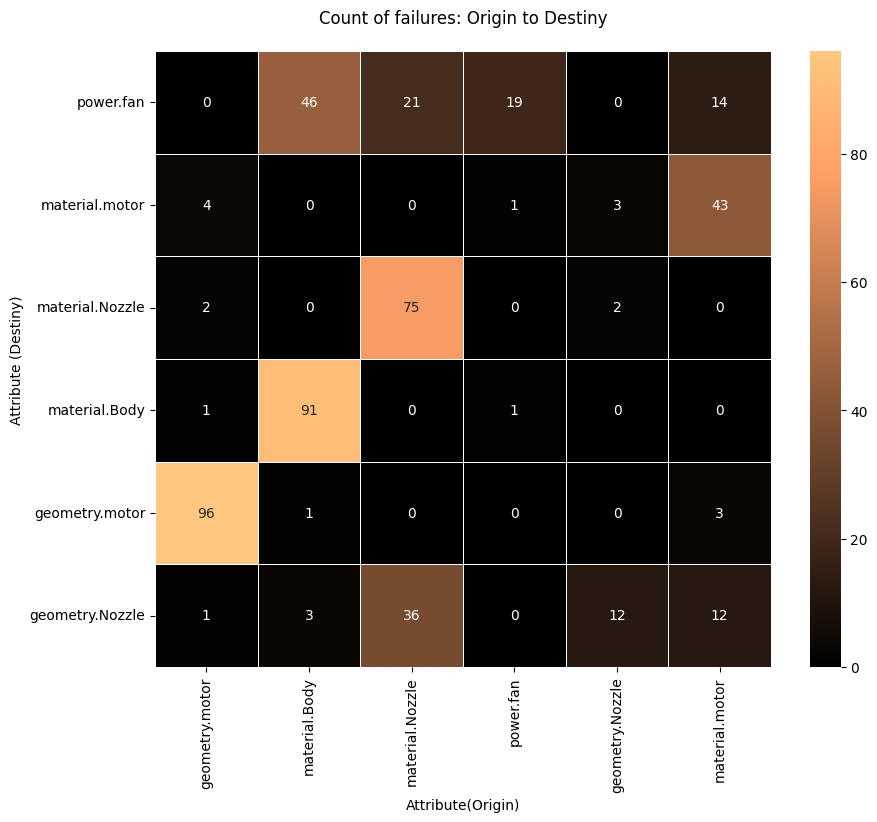

In [7]:
plot_heatmap(count_values=result)